<a href="https://colab.research.google.com/github/faisstzera/football-cv/blob/main/AILab_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu May 22 15:25:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   63C    P8             13W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import os
from google.colab import userdata

os.environ["HF_TOKEN"] = userdata.get("HF_TOKEN")
os.environ["ROBOFLOW_API_KEY"] = userdata.get("ROBOFLOW_API_KEY")

Install dependencies

In [4]:
!pip install -q gdown inference-gpu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 6.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.4/99.4 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.9/75.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.4/243.4 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.6 MB/s eta 0:00

In [5]:
!pip install -q git+https://github.com/roboflow/sports.git

  Preparing metadata (setup.py) ... done


In [6]:
!pip list | grep supervision

supervision                           0.25.1


In [7]:
import os
os.environ["ONNXRUNTIME_EXECUTION_PROVIDERS"] = "[CUDAExecutionProvider]"

In [8]:
from inference import get_model
from google.colab import userdata

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
PLAYER_DETECTION_MODEL_ID = "football-players-detection-3zvbc/12"
PLAYER_DETECTION_MODEL = get_model(model_id=PLAYER_DETECTION_MODEL_ID, api_key=ROBOFLOW_API_KEY)


/usr/local/lib/python3.11/dist-packages/inference/models/utils.py:340: ModelDependencyMissing: Your `inference` configuration does not support Qwen2.5-VL model. Use pip install 'inference[transformers]' to install missing requirements.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/inference/models/utils.py:352: ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/inference/models/utils.py:362: ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[sam]' to install missing requirements.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/inference/models/utils.py:373: ModelDependencyMissing: Your `inference` configuration does not support SAM model. Use pip install 'inference[clip]' to install missing requirements.
  warnings.warn(
/usr/local/lib/python3.11/dist-pack

In [9]:
!gdown -O "0bfacc_0.mp4" "https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF"
!gdown -O "2e57b9_0.mp4" "https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf"
!gdown -O "08fd33_0.mp4" "https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-"
!gdown -O "573e61_0.mp4" "https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU"
!gdown -O "121364_0.mp4" "https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu"

Downloading...
From: https://drive.google.com/uc?id=12TqauVZ9tLAv8kWxTTBFWtgt2hNQ4_ZF
To: /content/0bfacc_0.mp4
100% 19.9M/19.9M [00:00<00:00, 62.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=19PGw55V8aA6GZu5-Aac5_9mCy3fNxmEf
To: /content/2e57b9_0.mp4
100% 21.1M/21.1M [00:00<00:00, 84.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OG8K6wqUw9t7lp9ms1M48DxRhwTYciK-
To: /content/08fd33_0.mp4
100% 19.9M/19.9M [00:00<00:00, 101MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1yYPKuXbHsCxqjA9G-S6aeR2Kcnos8RPU
To: /content/573e61_0.mp4
100% 18.9M/18.9M [00:00<00:00, 87.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1vVwjW1dE1drIdd4ZSILfbCGPD4weoNiu
To: /content/121364_0.mp4
100% 17.2M/17.2M [00:00<00:00, 68.7MB/s]


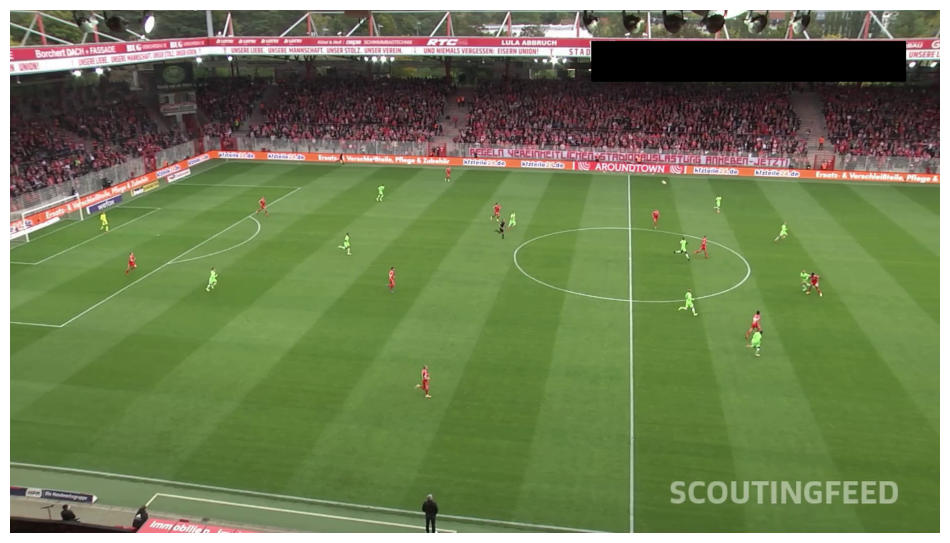

In [10]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

sv.plot_image(frame)

All detections with very low confidence:
Class ID: 2, Class Name: player, Confidence: 0.9256
Class ID: 2, Class Name: player, Confidence: 0.9170
Class ID: 1, Class Name: goalkeeper, Confidence: 0.9162
Class ID: 2, Class Name: player, Confidence: 0.9120
Class ID: 2, Class Name: player, Confidence: 0.9066
Class ID: 2, Class Name: player, Confidence: 0.9003
Class ID: 2, Class Name: player, Confidence: 0.8933
Class ID: 2, Class Name: player, Confidence: 0.8889
Class ID: 2, Class Name: player, Confidence: 0.8832
Class ID: 2, Class Name: player, Confidence: 0.8831
Class ID: 3, Class Name: referee, Confidence: 0.8811
Class ID: 2, Class Name: player, Confidence: 0.8769
Class ID: 2, Class Name: player, Confidence: 0.8750
Class ID: 2, Class Name: player, Confidence: 0.8749
Class ID: 2, Class Name: player, Confidence: 0.8730
Class ID: 2, Class Name: player, Confidence: 0.8680
Class ID: 2, Class Name: player, Confidence: 0.8667
Class ID: 1, Class Name: goalkeeper, Confidence: 0.8631
Class ID: 2, C

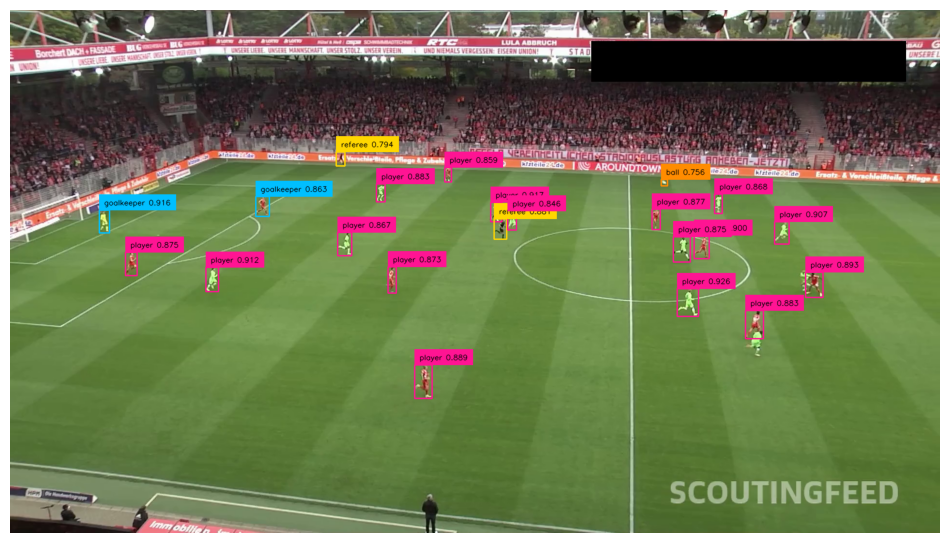

In [11]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"

box_annotator = sv.BoxAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#FF8C00', '#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000')
)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

# RETREINAR O MODELO PARA DETECTAR A BOLA
result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.2)

if isinstance(result, list):
    result = result[0]

detections = sv.Detections.from_inference(result)

print("All detections with very low confidence:")
for i in range(len(detections.class_id)):
    class_id = detections.class_id[i]
    class_name = result.predictions[i].class_name
    confidence = detections.confidence[i]
    print(f"Class ID: {class_id}, Class Name: {class_name}, Confidence: {confidence:.4f}")

labels = [
    f"{class_name} {confidence:.3f}"
    for class_name, confidence
    in zip(detections['class_name'], detections.confidence)
]

annotated_frame = frame.copy()
annotated_frame = box_annotator.annotate(scene=annotated_frame, detections=detections)
annotated_frame = label_annotator.annotate(scene=annotated_frame, detections=detections, labels=labels)

sv.plot_image(annotated_frame)

Detections(xyxy=array([[1344.,  351., 1357.,  364.]]), mask=None, confidence=array([0.75564742]), class_id=array([0]), tracker_id=None, data={'class_name': array(['ball'], dtype='<U10')}, metadata={})


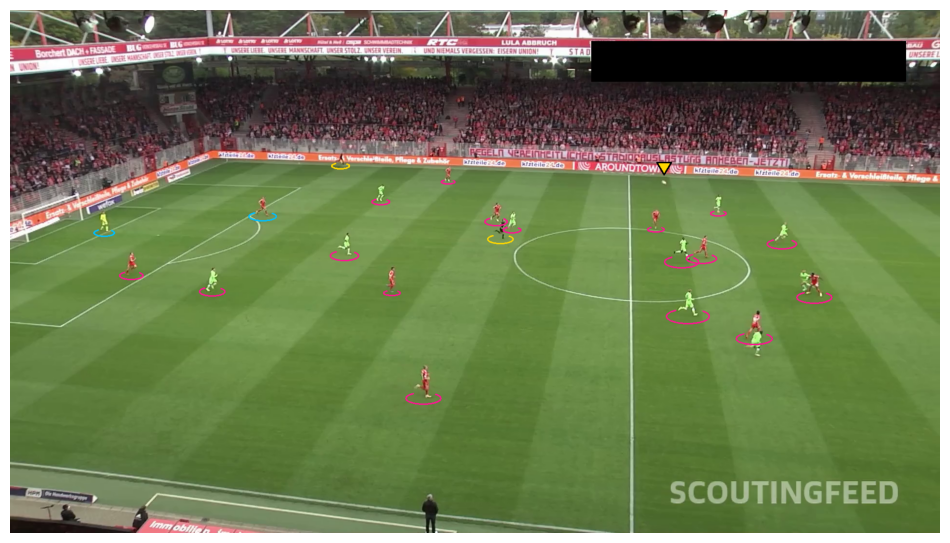

In [12]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
BALL_ID = 0

# to change the annotators we just need to check the supervision documentation

# ellipse: players, goalkeepers and referees
ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)

# triangle: ball
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=30,
    height=25,
    outline_thickness=2
)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result)

# divide into two groups: ball class and all other detections
ball_detections = detections[detections.class_id == BALL_ID]
print(ball_detections)

ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections.class_id -= 1

# passing the annotators to the frame
annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections)
annotated_frame = triangle_annotator.annotate(
    scene=annotated_frame,
    detections=ball_detections)

sv.plot_image(annotated_frame)

TESTAR ANNOTATORS DIFERENTES


Detections(xyxy=array([[1344.,  351., 1357.,  364.]]), mask=None, confidence=array([0.75564742]), class_id=array([0]), tracker_id=None, data={'class_name': array(['ball'], dtype='<U10')}, metadata={})


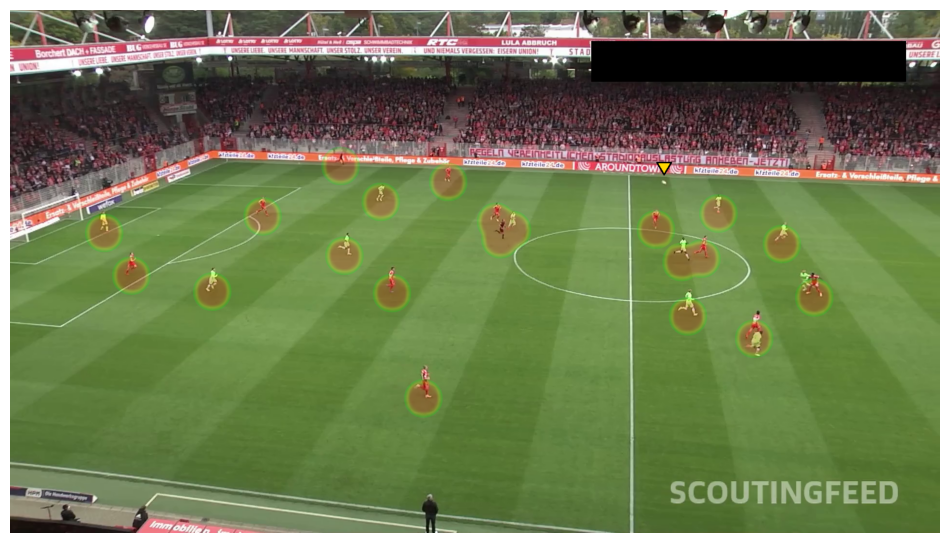

In [13]:
import supervision as sv

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
BALL_ID = 0

heat_map_annotator = sv.HeatMapAnnotator()

# triangle: ball
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=30,
    height=25,
    outline_thickness=2
)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result)

# divide into two groups: ball class and all other detections
ball_detections = detections[detections.class_id == BALL_ID]
print(ball_detections)

ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections.class_id -= 1

# passing the annotators to the frame
annotated_frame = frame.copy()
annotated_frame = heat_map_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections)
annotated_frame = triangle_annotator.annotate(
    scene=annotated_frame,
    detections=ball_detections)

sv.plot_image(annotated_frame)

In [14]:
import supervision as sv
import cv2

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
OUTPUT_VIDEO_PATH = "/content/output.mp4"
BALL_ID = 0

# anotadores
ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    thickness=2
)
label_annotator = sv.LabelAnnotator(
    color=sv.ColorPalette.from_hex(['#00BFFF', '#FF1493', '#FFD700']),
    text_color=sv.Color.from_hex('#000000'),
    text_position=sv.Position.BOTTOM_CENTER
)
triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=25,
    height=21,
    outline_thickness=1
)

# inicializa o tracker
tracker = sv.ByteTrack()
tracker.reset()

# pega os frames e metadados do vídeo
generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
video_info = sv.VideoInfo.from_video_path(SOURCE_VIDEO_PATH)

# inicializa o writer pra salvar o vídeo final
with sv.VideoSink(target_path=OUTPUT_VIDEO_PATH, video_info=video_info) as sink:
    for frame in generator:
        # inferência
        result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
        detections = sv.Detections.from_inference(result)

        # bola
        ball_detections = detections[detections.class_id == BALL_ID]
        ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

        # jogadores
        all_detections = detections[detections.class_id != BALL_ID]
        all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
        all_detections.class_id -= 1
        all_detections = tracker.update_with_detections(detections=all_detections)

        labels = [f"#{tracker_id}" for tracker_id in all_detections.tracker_id]

        # anotação no frame
        annotated_frame = frame.copy()
        annotated_frame = ellipse_annotator.annotate(annotated_frame, all_detections)
        annotated_frame = label_annotator.annotate(annotated_frame, all_detections, labels=labels)
        annotated_frame = triangle_annotator.annotate(annotated_frame, ball_detections)

        # escreve frame anotado no vídeo de saída
        sink.write_frame(annotated_frame)


## Como fazer o clustering em equipes?

Ideia: Calcular os pixels dentro de cada box dos players e utilizar essas cores + k-means para fazer o cluestring?

Drawbacks: A acurácia pode ser baixa, visto que os pixels podem conter a cor do gramado e noise, devemos pensar em um workaround para esse problema



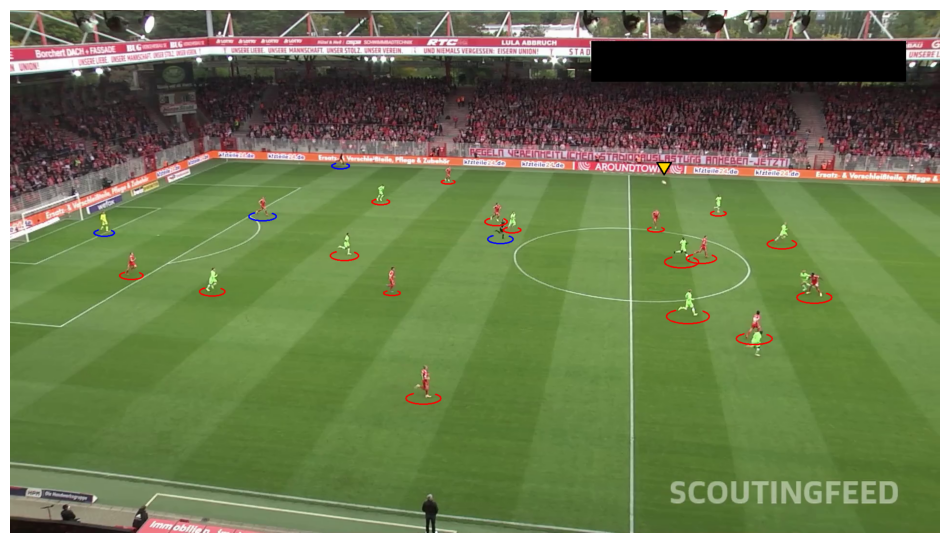

In [15]:
## V1 -> SEM O TRACKER

import supervision as sv
import cv2
import numpy as np
from sklearn.cluster import KMeans

SOURCE_VIDEO_PATH = "/content/121364_0.mp4"
BALL_ID = 0

# função pra extrair a cor dominante de dentro do bbox (crop central)
def extract_main_color(frame, xyxy, crop_ratio=0.6):
    x1, y1, x2, y2 = map(int, xyxy)
    w, h = x2 - x1, y2 - y1

    cx1 = int(x1 + w * (1 - crop_ratio) / 2)
    cy1 = int(y1 + h * (1 - crop_ratio) / 2)
    cx2 = int(x2 - w * (1 - crop_ratio) / 2)
    cy2 = int(y2 - h * (1 - crop_ratio) / 2)

    crop = frame[cy1:cy2, cx1:cx2]
    if crop.size == 0:
        return np.array([0, 0, 0])
    return crop.reshape(-1, 3).mean(axis=0)

frame_generator = sv.get_video_frames_generator(SOURCE_VIDEO_PATH)
frame = next(frame_generator)

result = PLAYER_DETECTION_MODEL.infer(frame, confidence=0.3)[0]
detections = sv.Detections.from_inference(result)

ball_detections = detections[detections.class_id == BALL_ID]
ball_detections.xyxy = sv.pad_boxes(xyxy=ball_detections.xyxy, px=10)

all_detections = detections[detections.class_id != BALL_ID]
all_detections = all_detections.with_nms(threshold=0.5, class_agnostic=True)
all_detections.class_id -= 1

# extrai cores dos jogadores - > acho q aqui vamos precisar fazer um cálculo para extrair a variância das cores
# o background faz com que fique difícil atribuir um time correto para cada um dos jogadores
# além disso, esqueci de separar o id do árbitro, para não atribuir um time a ele
player_colors = np.array([
    extract_main_color(frame, box)
    for box in all_detections.xyxy
])

# aplica k-means (2 clusters = 2 times)
kmeans = KMeans(n_clusters=2, n_init='auto').fit(player_colors)
team_ids = kmeans.labels_

# define cores dos times (vermelho e azul)
team_palette = ['#FF0000', '#0000FF']  # time 0 -> vermelho, time 1 -> azul
team_colors = [sv.Color.from_hex(team_palette[team_id]) for team_id in team_ids]

# cria um color palette personalizado com uma cor por jogador
ellipse_annotator = sv.EllipseAnnotator(
    color=sv.ColorPalette(team_colors),
    thickness=2
)

triangle_annotator = sv.TriangleAnnotator(
    color=sv.Color.from_hex('#FFD700'),
    base=30,
    height=25,
    outline_thickness=2
)

annotated_frame = frame.copy()
annotated_frame = ellipse_annotator.annotate(
    scene=annotated_frame,
    detections=all_detections
)
annotated_frame = triangle_annotator.annotate(
    scene=annotated_frame,
    detections=ball_detections
)

sv.plot_image(annotated_frame)